# KNN (K Nearest Neighbors)

Menghitung jumlah tetangga terdekat

Analyze whitewine.csv dataset
- Apply KNN method (k=3)
    - target: quality ( quality>6 as good, quality<=6 as bad)
    - features: density and alcohol
- Validate the model accuracy in 20% test set.
- Apply scaling and validate the model using 20% test set.
- Choose factor K based on accuracy.


In [192]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Load Dataset

In [193]:
df_wine = pd.read_csv('white_wine.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [194]:
# quality 0-6  --> Bad (class 0)
# quality 7-10 --> Good (class 1) 

df_wine['label'] = np.where(df_wine['quality']>6, 1, 0) 

df_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
265,6.9,0.29,0.40,19.45,0.043,36.0,156.0,0.9996,2.93,0.47,8.9,5.0,0
247,5.8,0.20,0.27,1.40,0.031,12.0,77.0,0.9955,3.25,0.36,10.9,7.0,1
399,6.4,0.19,0.42,2.90,0.032,32.0,83.0,0.9908,3.30,0.41,11.7,6.0,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.9970,3.02,0.63,9.3,5.0,0
109,6.9,0.33,0.28,1.30,0.051,37.0,187.0,0.9927,3.27,0.60,10.3,5.0,0


<AxesSubplot:xlabel='density', ylabel='alcohol'>

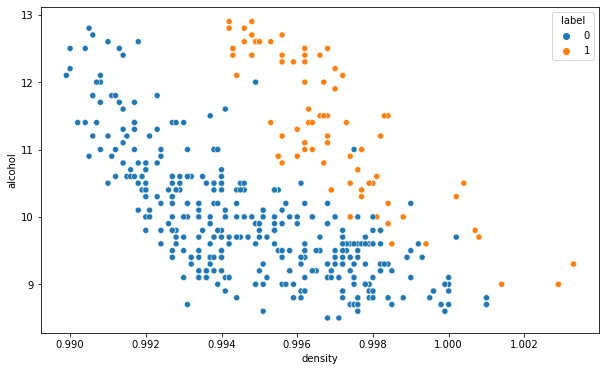

In [195]:
# visualyze density vs alcohol

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_wine, x='density', y='alcohol', hue='label')

In [196]:
df_wine.describe()[['density','alcohol']]

,density,alcohol
count,520.000000,519.000000
mean,0.995374,10.119461
std,0.002613,1.087835
min,0.989900,8.500000
25%,0.993400,9.300000
50%,0.995400,9.900000
75%,0.997400,10.700000
max,1.003300,12.900000


In [197]:
# check missing values
df_wine[['density','alcohol']].isna().sum()

density    0
alcohol    1
dtype: int64

In [198]:
# impute missing value in feature 'alcohol' with median
df_wine['alcohol'] = df_wine['alcohol'].fillna(df_wine['alcohol'].median())

In [199]:
df_wine[['density','alcohol']].isna().sum()

density    0
alcohol    0
dtype: int64

### Define features and target

In [200]:
X = df_wine[['alcohol','density']]
y = df_wine['label']

### Train Test Split

- Train set: untuk fitting model
- Test set: untuk prediksi

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df_wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

# test_size: untuk menentukan jumlah data/baris yg digunakan sebagai test set
# stratify=y: untuk menyamakan proporsi kelas 0 dan kelas 1 pada train set dan test set
# random_state: agar randomize konsisten

In [204]:
# X_train

### Modeling (without scaling)

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [206]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)

# fitting model to X_train y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [207]:
# predict 
y_pred = knn.predict(X_test)
y_pred

# y_pred adalah label yang diberikan oleh knn pada X_test 

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [208]:
# y_true (label aslinya)
y_test

434    1
252    0
279    1
265    0
109    0
      ..
504    0
192    0
317    0
441    0
77     1
Name: label, Length: 104, dtype: int32

In [209]:
print('Model KNN accuracy score in test set: ', accuracy_score(y_test, y_pred))

Model KNN accuracy score in test set:  0.9038461538461539


### Modeling (with scaling)

In [210]:
X

,alcohol,density
0,8.8,1.0010
1,9.5,0.9940
2,10.1,0.9951
3,9.9,0.9956
4,9.9,0.9956
...,...,...
515,10.4,0.9926
516,9.1,0.9934
517,10.4,0.9920
518,10.8,0.9918


In [211]:
from sklearn.preprocessing import MinMaxScaler

In [212]:
# define scaler
scaler = MinMaxScaler()

# fitting scaler to X_train
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
# X_train_scaled

In [214]:
# model 
knn = KNeighborsClassifier(n_neighbors=3)

# fitting model to X_train_scaled
knn.fit(X_train_scaled, y_train)

# predict
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [215]:
# accuracy
print('Model KNN with Scaling accuracy score in test set: ', accuracy_score(y_test, y_pred))

Model KNN with Scaling accuracy score in test set:  0.9807692307692307


**Kesimpulan**

- Akurasi meningkat setelah dlakukan scaling, dari yang awalnya 0.91 menjadi 0.99
- KNN membutuhkan scaling, karena menghitung jarak

### Choose factor K

mencari jumlah tetangga terbaik

In [216]:
k = range(1,30,2)

training_accuracy = []
testing_accuracy = []

score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    # predict in train set
    y_pred_train = knn.predict(X_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracy.append(acc_train)

    # predict in test set
    y_pred_test = knn.predict(X_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracy.append(acc_test) 

    if acc_test > score:
        score = acc_test
        best_k = i  

In [217]:
# training_accuracy

In [218]:
# testing_accuracy

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\anacon

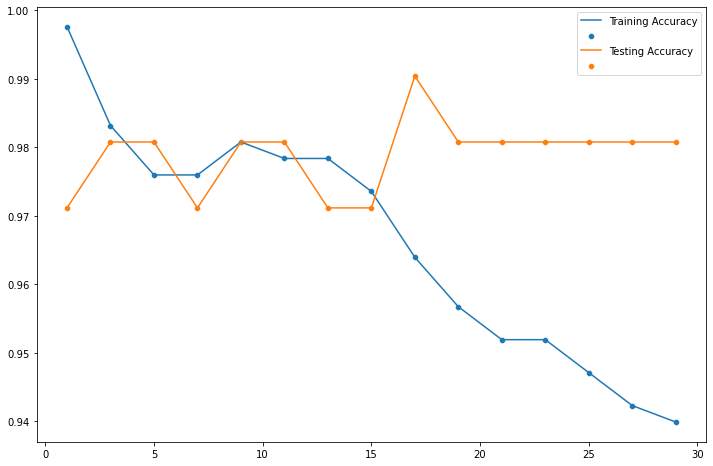

In [219]:
plt.figure(figsize=(12,8))

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)

sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)

plt.legend(['Training Accuracy', '','Testing Accuracy',''])

plt.show()

In [220]:
print('best k :', best_k)
print('accuracy :', score)

best k : 17
accuracy : 0.9903846153846154


In [221]:
# Cek
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)


0.9903846153846154

# EXERCISE: KNN

**Gunakan dataset 'cancer'**

- Pada latihan ini, kita sebaagai data scientist di bidang kedokteran diminta untuk menentukan apakah sebuah tumor merupakan kanker ganas (malignant) atau jinak (benign)

- Untuk simplifikasi, kita hanya akan menggunakan 2 feature:
    - Features: 'texture_mean', 'concave points_mean'
    - Target: 'diagnosis'
<br><br>

- Buat kolom baru yang berasal dari kololm diagnosis. Ubah dari string menjadi integer 
    - malignant --> 1
    - benign --> 0
<br><br>

- Lakukan splitting pada dataset dengan:
    - 20% test set 
    - random_state = 42
<br><br>

- Lakukan modeling dengan KNN   
- Temukan nilai K terbaik untuk model KNN, lalu gunakan metriks akurasi untuk mengevaluasi performa model antara KNN tanpa dan dengan scaling (MinMaxScaler). 

**Informasi terkait dataset dapat dilihat pada link berikut:** 

<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)> 
**atau** 
<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data> 

In [255]:
df = pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- diagnosis:<br>
    M: malignant (ganas)<br>
    B: benign (jinak)

- concave points (number of concave portions of the contour)
- texture (standard deviation of gray-scale values)

In [256]:
# Ubah category M (malignant) jadi 1 dan B (benign) jadi 0
df['label'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df['label']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: label, Length: 569, dtype: int64

In [258]:
# Define Features dan Target
X = df[['texture_mean', 'concave points_mean']]
y = df['label']

In [275]:
X.head()

,texture_mean,concave points_mean
0,10.38,0.14710
1,17.77,0.07017
2,21.25,0.12790
3,20.38,0.10520
4,14.34,0.10430


### **EDA**

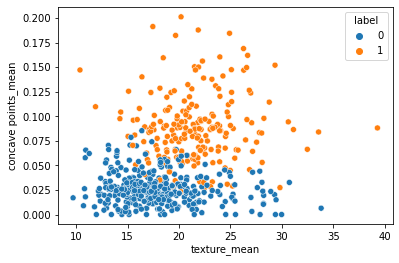

In [259]:
# Berdasarkan 2 features: 'texture_mean' dan 'concave points_mean', terlihat cancer yang M dan B cukup terpisah 
sns.scatterplot(x = 'texture_mean', y = 'concave points_mean', data = df, hue = 'label');

In [260]:
# Check missing value
df[['texture_mean', 'concave points_mean']].isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

### **Data Splitting**


In [261]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 42)

### **KNN Without Scaling**

In [262]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)

# training model (KNN belajar dari training set)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [263]:
# predict (KNN memprediksi M atau B berdasarkan features di test set )
y_predict_class = knn.predict(X_test)

print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7719298245614035


### **KNN With Scaling**


In [264]:
scaler = MinMaxScaler()

scaler.fit(X_train) # preprocess fit, diaplikasikan hanya pada data training

X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data X_test

In [265]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)

# training model
knn.fit(X_train_scaled, y_train) # model fit

# predict
y_predict_class = knn.predict(X_test_scaled) # model predict

print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9210526315789473


**Hasil akurasi dengan metode KNN meningkat setelah dilakukakn scaling**

- Tanpa scaling: 77.1%
- Dengan scaling: 92.1%


### **The best K Factor**


In [266]:
# mencari kisaran range untuk menentukan K factor terbaik dengan mengakarkan jumlah data
np.sqrt(df.shape[0])

23.853720883753127

In [267]:
# Find the best k

k = range(1, 30, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:

    # model
    knn = KNeighborsClassifier(n_neighbors = i)

    # training scaled data
    knn.fit(X_train_scaled, y_train)

    # akurasi pada training set
    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    # akurasi pada test set
    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    # jika ada akurasi yg lebih baik, 
    if acc_score > score:
        score = acc_score
        best_k = i

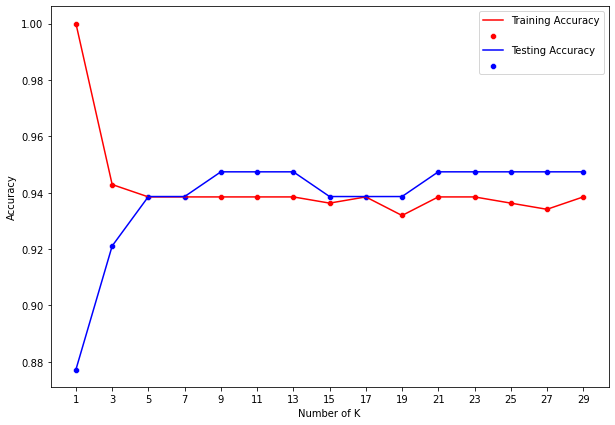

In [273]:
# Plot the accuracies result
plt.figure(figsize=(10, 7))

# akurasi pada train set
sns.lineplot(x=k, y=training_accuracies, color='r')
sns.scatterplot(x=k, y=training_accuracies, color='r')

# akurasi pada test set
sns.lineplot(x=k, y=testing_accuracies, color='b')
sns.scatterplot(x=k, y=testing_accuracies, color='b')


plt.legend(['Training Accuracy', '', 'Testing Accuracy', ''])
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.xticks(list(k))
plt.show()

In [269]:
# Hasil looping mencari k dengan accuracy terbaik
pd.DataFrame(
    {
        'k': k,
        'train accuracy': training_accuracies,
        'test accuracy': testing_accuracies
    }
)

,k,train accuracy,test accuracy
0,1,1.000000,0.877193
1,3,0.942857,0.921053
2,5,0.938462,0.938596
3,7,0.938462,0.938596
4,9,0.938462,0.947368
5,11,0.938462,0.947368
6,13,0.938462,0.947368
7,15,0.936264,0.938596
8,17,0.938462,0.938596
9,19,0.931868,0.938596


In [270]:
# The best K with its score
print('Faktor K terbaik =', best_k)
print('Nilai akurasi =', score)

Faktor K terbaik = 9
Nilai akurasi = 0.9473684210526315


### **Interpretasi**

Dari plot di atas, dapat dilihat bahwa jumlah K terbaik adalah 9 dengan accuracy mencapai 94.7%. 

---